In [1]:
!git clone https://github.com/vrama91/cider 
!mv cider/* ./
!rm -rf cider

Cloning into 'cider'...
remote: Enumerating objects: 218, done.
remote: Total 218 (delta 0), reused 0 (delta 0), pack-reused 218
Receiving objects: 100% (218/218), 31.08 MiB | 19.36 MiB/s, done.
Resolving deltas: 100% (118/118), done.


In [2]:
!sed -i 's/iteritems/items/g' /content/pyciderevalcap/cider/cider_scorer.py
!sed -i 's/xrange/range/g' /content/pyciderevalcap/cider/cider_scorer.py
!sed -i 's/from cider_scorer import CiderScorer/from pyciderevalcap.cider.cider_scorer import CiderScorer/g' /content/pyciderevalcap/cider/cider.py

In [3]:
import numpy as np
from numpy import array
import pandas as pd
import matplotlib.pyplot as plt 
import string
import os
from PIL import Image
import glob
from pickle import dump, load
from tqdm import tqdm_notebook as tqdm
from time import time

try:
    import dill as pickle
except ImportError:
    import pickle

base_dir = "/content/drive/My Drive/MB/"
images_dir = "/content/drive/My Drive/Flickr8k_Dataset/Flicker8k_Dataset/"

from google.colab import drive
drive.mount('/content/drive')

import pdb
from pyciderevalcap.cider.cider import Cider
from pyciderevalcap.tokenizer.ptbtokenizer import PTBTokenizer
from operator import itemgetter

Mounted at /content/drive


In [5]:
def clean_descriptions(descriptions):
  def clean_image_descriptions(img_descriptions):
    words_to_filter = ['startseq', 'endseq']
    
    return [' '.join([token for token in desc.split() if token not in words_to_filter]) for desc in img_descriptions]
  return {(k+'.jpg'): clean_image_descriptions(v) for k, v in descriptions.items()}

Size=1000
test mean CIDEr score=0.3304
test 10 best scores:
[(664, 2.876693148910922), (189, 2.7617814646355114), (694, 2.5232102949166766), (717, 2.1013508506078122), (707, 2.0468395355129996), (954, 2.041270032737919), (160, 2.023044454427468), (92, 1.9877096667029015), (547, 1.983399334283233), (429, 1.9440822546429986)]


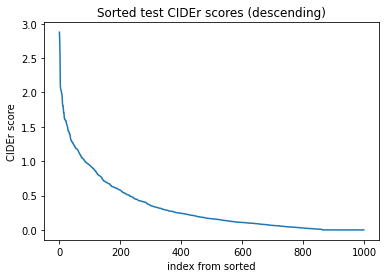

In [6]:
test_descriptions = clean_descriptions(pickle.load(open("/content/drive/MyDrive/MB/test_descriptions.pkl", "rb")))
test_predictions = pickle.load(open("/content/drive/MyDrive/MB/test_predictions.pkl", "rb"))

print('Size=%d' % len(test_descriptions))

gts_test = test_descriptions
res_test = [{'image_id': k, 'caption': [v]} for k, v in test_predictions.items()]

cider = Cider(df='corpus')
test_score, test_scores = cider.compute_score(gts_test, res_test)
print('test mean CIDEr score=%.4f' % test_score)

test_scores_with_index_sorted = sorted(enumerate(test_scores), key=itemgetter(1), reverse=True)
print('test 10 best scores:')
print(test_scores_with_index_sorted[:10])

plt.plot([x[1] for x in test_scores_with_index_sorted])
plt.ylabel('CIDEr score')
plt.xlabel('index from sorted')
plt.title('Sorted test CIDEr scores (descending)')
plt.show()

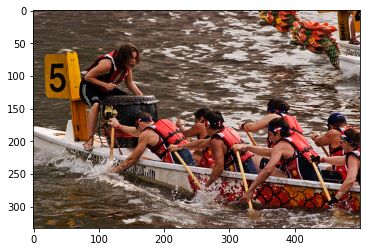

photo score:  0.0
predicted: man kayaking river
actual: 
group people rowing boat contest
rowing team race forward competition motivation leader front boat
boat number several men life jacket paddling water
people orange vest rowing great effort
several people rowing boat cheered person drum


In [10]:
# index to notice: -4
photo_index, photo_score = test_scores_with_index_sorted[-4]
res = res_test[photo_index]
photo_id = res['image_id']
photo_path = images_dir + photo_id
photo=plt.imread(photo_path)
plt.imshow(photo)
plt.show()
print('photo score: ', photo_score)
print('predicted: %s' % res['caption'][0])
print('actual: ')
for c in gts_test[photo_id]:
  print(c)

Size=6000
train mean CIDEr score=0.4804
train 10 best scores:
[(699, 5.835266555182043), (4022, 5.5911536570487606), (1517, 5.279574598130187), (1817, 5.236240731524722), (5153, 5.20425271618055), (5415, 5.121096293655391), (4041, 5.0746130071008295), (1997, 4.9947899555674), (136, 4.7711911026542095), (4205, 4.583451500911548)]


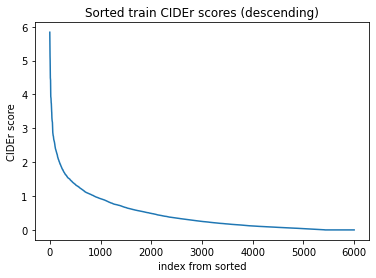

In [8]:
train_descriptions = clean_descriptions(pickle.load(open("/content/drive/MyDrive/MB/train_descriptions.pkl", "rb")))
train_predictions = pickle.load(open("/content/drive/MyDrive/MB/train_predictions.pkl", "rb"))

print('Size=%d' % len(train_descriptions))

gts_train = train_descriptions
res_train = [{'image_id': k, 'caption': [v]} for k, v in train_predictions.items()]

cider = Cider(df='corpus')
train_score, train_scores = cider.compute_score(gts_train, res_train)
print('train mean CIDEr score=%.4f' % train_score)

train_scores_with_index_sorted = sorted(enumerate(train_scores), key=itemgetter(1), reverse=True)
print('train 10 best scores:')
print(train_scores_with_index_sorted[:10])

plt.plot([x[1] for x in train_scores_with_index_sorted])
plt.ylabel('CIDEr score')
plt.xlabel('index from sorted')
plt.title('Sorted train CIDEr scores (descending)')
plt.show()

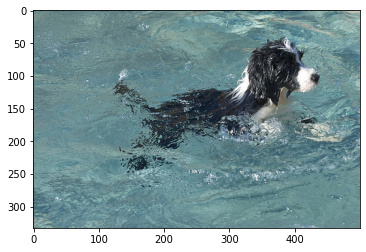

photo score:  5.835266555182043
predicted: black white dog swimming water
actual: 
black white dog swimming water
black white dog swimming
black white dog swim blue water
small black white dog swimming water
small black white dog paddle clear blue water


In [9]:
#index to notice: -4
photo_index, photo_score = train_scores_with_index_sorted[0]
res = res_train[photo_index]
photo_id = res['image_id']
photo_path = images_dir + photo_id
photo=plt.imread(photo_path)
plt.imshow(photo)
plt.show()
print('photo score: ', photo_score)
print('predicted: %s' % res['caption'][0])
print('actual: ')
for c in gts_train[photo_id]:
  print(c)